# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [2]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

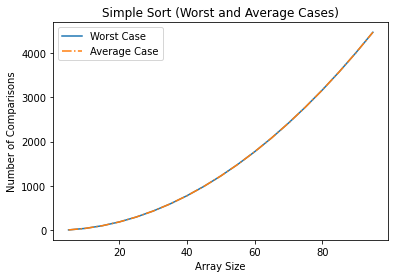

In [3]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case') 
plt.plot(array_sizes, num_compares_random, linestyle='dashdot', label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [4]:
def bubble_sort(a):
    # Implement code to bubble sort the given array a in place.
    # Also return the number of comparisons. 
    num_compares = 0
    n = len(a)
    for i in range(n):
        # Previous i elements already sorted
        flag = 0
        for j in range(0, n-i-1):
            num_compares = num_compares + 1
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]  # swap
                flag = 1
        if flag == 0:
            break
    return num_compares

### Complexity Analysis of Bubble Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __

#### BUBBLE SORT

<b>Note</b>: Bubble sort can be optimized by including a flag variable to record the event where we make a pass through the array without performing any swaps. Whenever this happens, we know the array is sorted. Thus, we can break out of both loops. Then, in the best case, when the array is already sorted, we can achieve $\Theta(n)$ time.

<b>Worst Case</b>:
Bubble sort has $\Theta(n^2)$ time complexity in the worst case.  This can be easily seen. In the first pass, we have max $n-1$ comparisons. In the second pass, we have max $n-2$ comparisons. In the third pass, max $n-3$ comparisons. The pattern continues until we have a single comparison. We note that this is simply the sum of natural numbers. $\sum_{i=1}^{n-1} = \frac{n(n-1)}{2} = \Theta(n^2)$

<b>Average Case</b>:
In the average case, we have $\Theta(n^2)$ time complexity. Note that our flag variable is also a minor optimization in the average case. (This can be seen in the plot below).

<b>Worst Case Inputs</b>: The worst case input would be an array of values sorted in descending order. To create this, we should simply fill an array with numbers that decrease in value with increasing index $i$, for $i \in \{0, 1, \dots, n-1\}$, where $n$ is the size of the array. With distinct elements, we have that $\left[A[0] > A[1] > \dots > A[n-1]\right]$

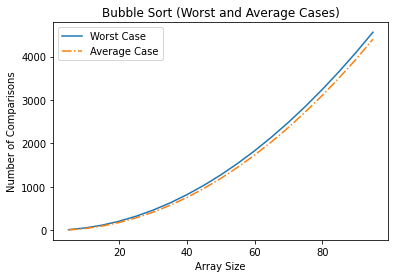

In [5]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them

import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Bubble Sort worst case occurs when input array is sorted descending
def create_descending_sorted_array(a_size):
    a = []
    for i in range(a_size, -1, -1):
        a.append(i)
    return a

# -------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------

#CODE TO GENERATE AVERAGE CASE
# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_descending_sorted_array(n)
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
    
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
    

# Code for plotting
plt.plot(array_sizes, num_compares_wc, label='Worst Case') 
plt.plot(array_sizes, num_compares_random, linestyle='dashdot', label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Bubble Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Merge Sort

In [6]:
num_compares_merge = 0

def merge(arr, l, r):
    global num_compares_merge
    i = 0
    j = 0
    k = 0
    while i < len(l) and j < len(r):  # while in range
        num_compares_merge = num_compares_merge + 1
        # merge l and r in ascending order into arr
        if l[i] < r[j]:
            arr[k] = l[i]
            i = i + 1
        else:
            arr[k] = r[j]
            j = j + 1
        k = k + 1

    while i < len(l):  # copy remaining elements
        arr[k] = l[i]
        i = i + 1
        k = k + 1

    while j < len(r):  # copy remaining elements
        arr[k] = r[j]
        j = j + 1
        k = k + 1


def merge_sort_recursive(arr):
    if len(arr) > 1:
        m = len(arr)//2
        l = arr[:m]
        r = arr[m:]

        # Sort the left and right
        merge_sort_recursive(l)
        merge_sort_recursive(r)
        merge(arr, l, r)


def merge_sort(a):
    # Implement the code for merge sort
    # Use a function merge_sort_recursive to implement the recursive call
    # Be careful in counting number of comparisons since you should include comparisons in the merge part.
    # Also: code needs to sort the array a. You may have to copy things over from a temp array back into a.
    return merge_sort_recursive(a)

### Complexity Analysis of Merge Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __


#### MERGE SORT

<b>Worst Case</b>:
Merge Sort has worst case time complexity of $\Theta(nlogn)$. This can be seen by drawing a recursion tree. At each level of the tree, we have n-elements being merged. Merging takes $\Theta(n)$ time. The height of the tree is $logn$. So we have $\Theta(n)$ work being performed $logn$ times. For a time complexity of $\Theta(nlogn)$. We note that the merge step (combine step) dominates the divide step.

<b>Average Case</b>: The average case of Merge Sort is $\Theta(nlogn)$. We want to impose a uniform distribution on our input space so as to avoid the worst case (where each subarray involved in a merge contains alternating elements). Random shuffling of the input array is a quick and easy way to ensure that each input distribution turns up with equal probability, and thus, that the worst case is as rare as any other case.

<b>Worst Case Inputs</b>: The worst case input would be an array, such that each subarray involved in merge operation contains alternating elements. As an example: 

$$[1,2,3,4,5,6,7,8]$$
$$[1,3,5,7] \quad [2,4,6,8]$$
$$[1,5] \quad [3,7] \quad [2,6] \quad [4,8]$$
$$[5,1] \quad [7,3] \quad [6,2] \quad [8,4]$$
$$[5,1,7,3] \quad [6,2,8,4]$$
$$[5,1,7,3,6,2,8,4]$$




So for given input array $[1,2,3,4,5,6,7,8]$ we have worst case input $[5,1,7,3,6,2,8,4]$.

Source: https://www.baeldung.com/cs/merge-sort-time-complexity

In this example, every element for both arrays must be compared at least once while merging. This will maximize comparisons, and yield worst case running time.

wc
[8, 25, 45, 69, 94, 119, 146, 177, 201, 237, 261, 297, 327, 361, 395, 433, 456, 491, 538]
ac
[7.169, 22.725, 41.702, 63.511, 86.933, 111.411, 137.826, 165.213, 193.227, 221.903, 251.308, 281.101, 311.639, 343.523, 375.41, 408.312, 441.326, 474.343, 507.587]


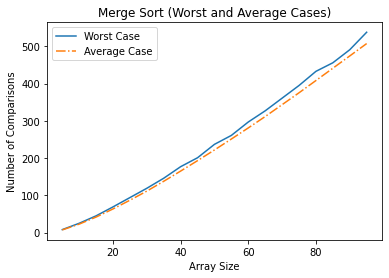

In [7]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them

import random
# global variables
target = []
rem = None

array_sizes = range(5, 100, 5)

# CODE TO GENERATE WORST CASE
# Merge Sort worst case occurs when each subarray to be merged has alternating elements
def modified_merge_to_create_worst_case_input(a, target, remainder):
    global rem
    i = 0
    j = 0
    k = 0
    if len(a) <= 2:  # while in range
        sorted_a = sorted(a, reverse=True)
        for item in sorted_a:
            target.append(item)
        if rem is not None:
            for item in rem:
                target.append(item)
            rem = None


def create_worst_case_input(a, target):
    global rem
    a.sort()
    if len(a) > 1:
        a1 = a[::2]  # divide step
        a2 = a[1::2]
        if len(a1) == 1 and len(a2) != 1:
            rem = a1
        if len(a1) != 1 and len(a2) == 1:
            rem = a2

        # Sort the left and right
        create_worst_case_input(a1, target)
        create_worst_case_input(a2, target)
        modified_merge_to_create_worst_case_input(a, target, rem)


# -------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------

# CODE TO GENERATE AVERAGE CASE
# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = list(range(n))
    create_worst_case_input(a, target)
    a = target
    merge_sort(a)
    nc = num_compares_merge
    target = []
    num_compares_merge = 0
    num_compares_wc.append(nc)

num_compares_merge = 0

# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        merge_sort(a)
        nc = num_compares_merge
        total = total + nc
        num_compares_merge = 0
    avg = total / num_trials
    num_compares_random.append(avg)

print("wc")
print(num_compares_wc)
print("ac")
print(num_compares_random)

# Code for plotting
plt.plot(array_sizes, num_compares_wc, label='Worst Case') 
plt.plot(array_sizes, num_compares_random, linestyle='dashdot', label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Merge Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Quick Sort


In [8]:
num_compares_quick = 0


def quick_sort(a):
    # Implement code for quick sort
    # Must sort the array a in place
    # Must return the number of comparisons
    n = len(a)
    quicksort(a, 0, n-1) # you can implement it how you wish
    return num_compares_quick


def swap(A, index1, index2):
    n = len(A)
    if index1 < n and index2 < n:
        A[index1], A[index2] = A[index2], A[index1]
        return A
    else:
        return


def partition(A, right):
    global num_compares_quick
    i = -1
    j = 0
    pivot = A[right]
    while j < right:
        num_compares_quick = num_compares_quick + 1
        if A[j] < pivot:  # Region 1
            swap(A, i + 1, j)
            i = i + 1
            j = j + 1
        else:  # Region 2
            j = j + 1
    swap(A, i + 1, right)  # place pivot element
    return i + 1  # return pivot location


def quicksort(A, left, right):
    if left < right:
        p = partition(A, right)
        quicksort(A, left, p - 1)
        quicksort(A, p + 1, right)
    

### Complexity Analysis of Quick Sort

__Todo: explain what the worst and average cases are. Explain how you would craft inputs for the worst case __


#### QUICKSORT

<b>Note</b>:

<b>Worst Case</b>:
The worst case time complexity of Quicksort is $\Theta(n^2)$. This occurs when the array is already sorted. Given that my implementation always selects the last element as the pivot... the worst case occurs when the input array is already sorted descending. 

<b>Average Case</b>: The average case for Quicksort is $\Theta(nlogn)$. This occurs when our input array is not adversarial in any way (already sorted). We want to impose a uniform distribution on our input space so as to avoid the worst case (always selecting the largest or smallest element). Random shuffling of the input array is a quick and easy way to ensure that each input distribution turns up with equal probability, and thus, that the worst case (already sorted) is as rare as any other case.


<b>Worst Case Inputs</b>: The worst case input for my implementation of Quicksort is an input array which is already sorted descending. This forces the worst possible partition, where we always choose the largest or smallest element in the list as the pivot element. This yields subproblems of size $n$, $n-1$, $n-2, \dots 1$. 

This is the sum of natural numbers. $\sum_{i = 1}^{n} = \frac{n(n+1)}{2}$. Which gives $\Theta(n^2)$ time complexity. 

We can also see this with the recurrence $T(n) = T(n-1) + \Theta(n) = \Theta(n^2)$

wc
[21, 80, 176, 310, 481, 690, 936, 1220, 1541, 1900, 2296, 2730, 3201, 3710, 4256, 4840, 5461, 6120, 6816]
ac
[9.801, 40.648, 90.476, 159.265, 245.669, 347.929, 470.679, 612.179, 765.954, 937.843, 1131.621, 1333.873, 1559.731, 1803.402, 2058.287, 2338.591, 2628.472, 2942.24, 3268.177]


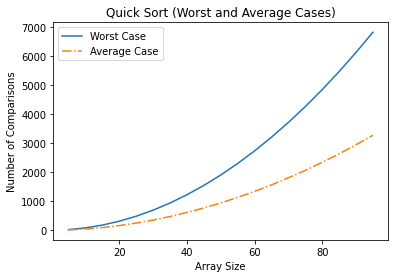

In [9]:
## WRITE CODE HERE TO GENERATE WORST CASE and AVERAGE CASE INPUTS/PLOT
## You may cut and paste from code we provided or directly call them

import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Bubble Sort worst case occurs when input array is sorted descending
def create_descending_sorted_array(a_size):
    a = []
    for i in range(a_size, -1, -1):
        a.append(i)
    return a

# -------------------------------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------------------------------

#CODE TO GENERATE AVERAGE CASE
# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_descending_sorted_array(n)
    nc = quick_sort(a)
    num_compares_quick = 0
    num_compares_wc.append(nc)
    
num_compares_quick = 0
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total = total + nc
        num_compares_quick = 0
    avg = total / num_trials
    total = 0
    num_compares_random.append(avg)
    
print("wc")
print(num_compares_wc)
print("ac")
print(num_compares_random)

# Code for plotting
plt.plot(array_sizes, num_compares_wc, label='Worst Case') 
plt.plot(array_sizes, num_compares_random, linestyle='dashdot', label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Quick Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

-----
## Testing Code: Do not edit



In [10]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [11]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [12]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [13]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [14]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
